In [2]:
pip install tenserflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


In [4]:
df = pd.read_csv("stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


In [5]:
data = df[['AMZN']].values


In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [7]:
# Create sequences for CNN
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)


In [8]:
# Split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [9]:
# Reshape for CNN (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
# Build CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

c:\Users\ibmuser\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0121
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0790e-04
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6759e-04
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4570e-04
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8221e-04
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3584e-04
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2692e-04
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2100e-04
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9831e-04
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1132e-04


In [12]:
# Predict
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [13]:
# Evaluation
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
print(f"Test RMSE: {rmse:.2f}")


Test RMSE: 157.58


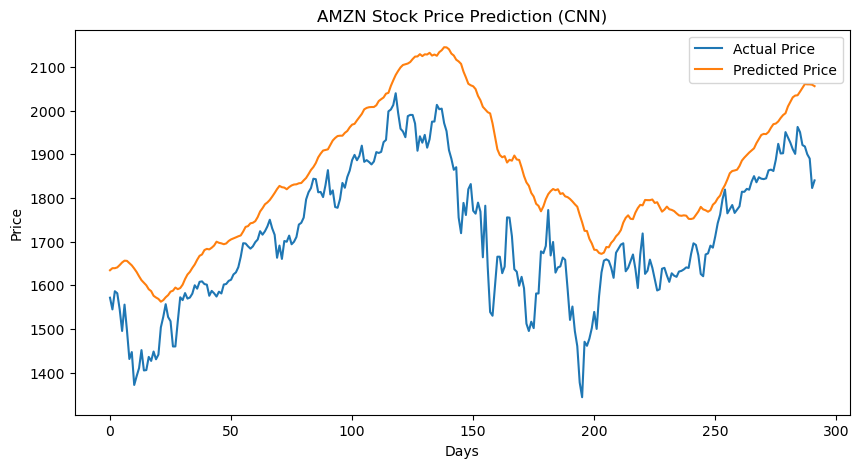

In [14]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.title("AMZN Stock Price Prediction (CNN)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()